In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import credentials
import requests

from tools import *
sns.set()

In [2]:
# url = "https://api.eia.gov/v2/electricity/rto/fuel-type-data/data/"

# parameters = {
#     'api_key':credentials.api_key
# }

# header2 = {'X-Params': '{"frequency":"hourly","data":["value"],"facets":{},"start":"2022-01-01T00","end":"2022-01-28T00","sort":[{"column":"period","direction":"desc"}],"offset":0,"length":5}'}

# response = requests.get(url, params=parameters,headers=header2)
# print(header2)
# print("Successfully retrieved %d data"%len(response.json()['response']['data']))
# response.status_code

# Creating function to get the EIA data


In [3]:
#data = EIA_API_request(facets='{"respondent": ["CISO"],"fueltype": ["SUN","WND"]}', start="2018-07-01T00",end="2023-07-09T00")

#data.keys()

In [4]:
data = EIA_API_request(
        facets='{"respondent": ["CISO"],"fueltype": ["SUN"]}'
        , start="2018-07-01T00",end="2023-07-09T00"
        ,offset=0,length=50000
    )

data.head()

# offset = 5000
# while left >0:
#     json = EIA_API_request(
#         facets='{"respondent": ["CISO"],"fueltype": ["SUN","WND"]}'
#         , start="2018-07-01T00",end="2023-07-09T00"
#         ,offset=offset,length=5000
#     )
#     data = pd.concat([data,pd.json_normalize(json['response']['data'])], ignore_index=True)
#     offset+=5000
#     left = entries - offset
#     print(offset)

# data.head()

Successfully retrieved 5000 data
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"fueltype": ["SUN"]},"start":"2018-07-01T00","end":"2023-07-09T00","sort":[{"column":"period","direction":"desc"}],"offset":5000,"length":50000}'}
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"fueltype": ["SUN"]},"start":"2018-07-01T00","end":"2023-07-09T00","sort":[{"column":"period","direction":"desc"}],"offset":10000,"length":50000}'}
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"fueltype": ["SUN"]},"start":"2018-07-01T00","end":"2023-07-09T00","sort":[{"column":"period","direction":"desc"}],"offset":15000,"length":50000}'}
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"fueltype": ["SUN"]},"start":"2018-07-01T00","end":"2023-07-09T00","sort":[{"column":"period","direction":"desc"}],"offset":20000,"length":50000}'}
{'X-Params': '{"frequency":"hour

,period,respondent,respondent-name,fueltype,type-name,value,value-units
0,2023-07-09T00,CISO,California Independent System Operator,SUN,Solar,12972.0,megawatthours
1,2023-07-08T23,CISO,California Independent System Operator,SUN,Solar,13656.0,megawatthours
2,2023-07-08T22,CISO,California Independent System Operator,SUN,Solar,14179.0,megawatthours
3,2023-07-08T21,CISO,California Independent System Operator,SUN,Solar,14356.0,megawatthours
4,2023-07-08T20,CISO,California Independent System Operator,SUN,Solar,14319.0,megawatthours


In [5]:
#data.reset_index(drop=True)
data.index

RangeIndex(start=0, stop=43995, step=1)

In [6]:
data.tail()

,period,respondent,respondent-name,fueltype,type-name,value,value-units
43990,2018-07-01T12,CISO,California Independent System Operator,SUN,Solar,-38.0,megawatthours
43991,2018-07-01T11,CISO,California Independent System Operator,SUN,Solar,-38.0,megawatthours
43992,2018-07-01T10,CISO,California Independent System Operator,SUN,Solar,-36.0,megawatthours
43993,2018-07-01T09,CISO,California Independent System Operator,SUN,Solar,-35.0,megawatthours
43994,2018-07-01T08,CISO,California Independent System Operator,SUN,Solar,-36.0,megawatthours


<Axes: ylabel='value'>

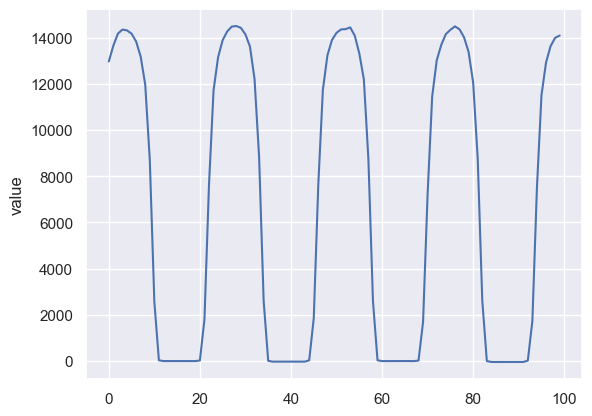

In [7]:
sns.lineplot(data=data.iloc[:100],x=data.index[:100],y='value')

In [8]:
# data_wind = data[data['fueltype']=='WND']
# data_solar = data[data['fueltype']=='SUN']

<Axes: ylabel='value'>

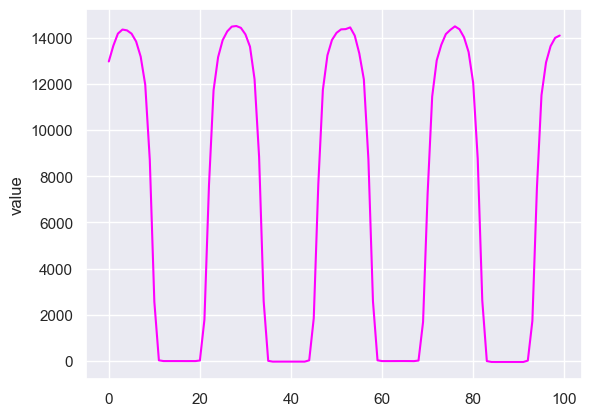

In [12]:
sns.lineplot(data=data.iloc[:100],x=data.index[:100],y='value',c='magenta')
#sns.lineplot(data=data_wind.iloc[:100],x=data_wind.index[:100],y='value',c='magenta')

# Getting Demand Data of CISO

In [14]:
url = "https://api.eia.gov/v2/electricity/rto/region-data/data/"
demand_data = EIA_API_request(
    url=url
    ,facets='{"respondent": ["CISO"],"type": ["D"]}'
    , start="2015-07-01T00",end="2023-07-12T00"
    ,sort='[{"column":"period","direction":"asc"}]'
    ,offset=0,length=500000
)

demand_data.head()

Successfully retrieved 5000 data
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"type": ["D"]},"start":"2015-07-01T00","end":"2023-07-12T00","sort":[{"column":"period","direction":"asc"}],"offset":5000,"length":500000}'}
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"type": ["D"]},"start":"2015-07-01T00","end":"2023-07-12T00","sort":[{"column":"period","direction":"asc"}],"offset":10000,"length":500000}'}
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"type": ["D"]},"start":"2015-07-01T00","end":"2023-07-12T00","sort":[{"column":"period","direction":"asc"}],"offset":15000,"length":500000}'}
{'X-Params': '{"frequency":"hourly","data":["value"],"facets":{"respondent": ["CISO"],"type": ["D"]},"start":"2015-07-01T00","end":"2023-07-12T00","sort":[{"column":"period","direction":"asc"}],"offset":20000,"length":500000}'}
{'X-Params': '{"frequency":"hourly","data":["value"],"fa

,period,respondent,respondent-name,type,type-name,value,value-units
0,2015-07-01T08,CISO,California Independent System Operator,D,Demand,31486.0,megawatthours
1,2015-07-01T09,CISO,California Independent System Operator,D,Demand,28989.0,megawatthours
2,2015-07-01T10,CISO,California Independent System Operator,D,Demand,27416.0,megawatthours
3,2015-07-01T11,CISO,California Independent System Operator,D,Demand,26388.0,megawatthours
4,2015-07-01T12,CISO,California Independent System Operator,D,Demand,25661.0,megawatthours


In [16]:
 demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70358 entries, 0 to 70357
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   period           70358 non-null  object 
 1   respondent       70358 non-null  object 
 2   respondent-name  70358 non-null  object 
 3   type             70358 non-null  object 
 4   type-name        70358 non-null  object 
 5   value            70085 non-null  float64
 6   value-units      70358 non-null  object 
dtypes: float64(1), object(6)
memory usage: 3.8+ MB


In [ ]:
entries = json['response']['total']
entries

In [ ]:
# offset = 5000
# data = pd.DataFrame()
# while left >0:
#     json = EIA_API_request(
#         facets='{"respondent": ["CISO"],"type": ["D","NG"]}'
#         , start="2018-07-01T00",end="2023-07-09T00"
#         ,sort='[{"column":"period","direction":"asc"}]'
#         ,offset=offset,length=5000
#     )
#     data = pd.concat([data,pd.json_normalize(json['response']['data'])], ignore_index=True)
#     offset+=5000
#     left = entries - offset
#     print(offset)

# data.head()

In [ ]:
list(range(0,-5))